# Visualization of Data

## Instructions

### Visualization of the german credit data
You need to **work collaboratively** to finish this task. The objective is
- To gain insights from the data via visualization and
- Identify groups of good credit risk and bad credit risk (i.e. good loan takers and bad loan takers).

This is the continuation of the previous task. You can find the data `german_credit_data.csv` saved under the [data](../data) folder.<br>
NOTE: **You can check the reference website**    

You already answered the questions in the previous task. Now we want to **visualize the finding below**.

- What are mean age, mean credit amount, and duration?
- What are the major three purpose of loan?
- What is the majoriry loan taker? Male of female?<br>

In order to gain the insights required, you may ask youself<br>
For both good loan and bad loan takers:
- What is the distrubition of purpose of loan?
- What is the distribution of age?
- What is the distribution of and amount of loan?
- Is there any correlation between the purpose of loan and gender?
- Is there any correlation between the purpose of loan and age group?
- ...etc.

You can think of any other method to analyse the data. As long as you can visualize it and help to gain insights on the good and bad loan takers.

Note:
- You are **ALLOWED** to import other library or package
- You can write you own functions
- Your answers should be readable with approprate comments
- You can refer to [markdown cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) if you are not familar with Markdown

### Reference
This dataset was sourced from Kaggle: https://www.kaggle.com/uciml/german-credit

The original source is: https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29

## Import libraries 

In [27]:
# Usual libraries are imported here
import os
import yaml
import dask.dataframe as dd
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Please perform your tasks below and answer the questions

In [28]:
# Read the csv file

data = pd.read_csv("german_credit_data.csv") 

Text(0.5, 1.0, 'The Loan Amount Distribution')

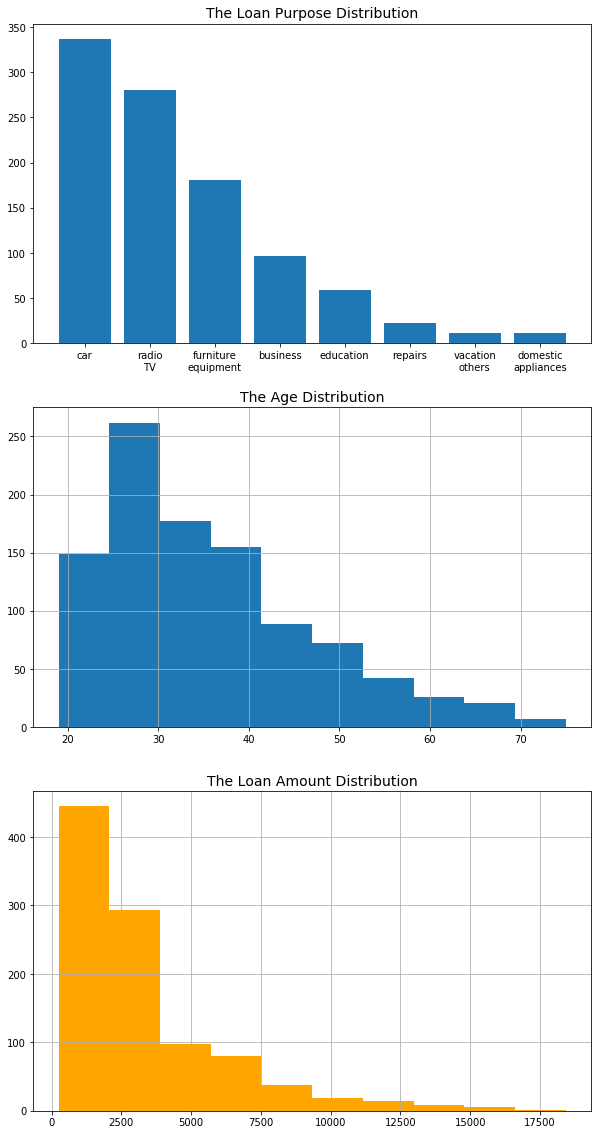

In [89]:
# Distribution of purpose of loan
data["Purpose"].value_counts()

loan_label = []
loan_count = []

# Store the loan purpose labels and counts in variables
for i in range(data["Purpose"].value_counts().shape[0]):
    loan_label.append(data["Purpose"].value_counts().index[i])
    loan_count.append(data["Purpose"].value_counts()[i])
    
wrapped_labels = [label.replace('/', '\n') for label in loan_label]
wrapped_labels = [label.replace(' ', '\n') for label in wrapped_labels]

# Start to create the plot by creating dimensions of windows plot
fig, ax = plt.subplots(3, figsize=(10,20))
ax[0].bar(wrapped_labels, loan_count)
ax[0].set_title("The Loan Purpose Distribution", fontsize=14)

# Plot the age distribution using histogram
data.Age.hist(ax=ax[1])
ax[1].set_title("The Age Distribution", fontsize=14)

# Plot the loan amount distribution using histogram
data['Credit amount'].hist(ax=ax[2], color="orange")
ax[2].set_title("The Loan Amount Distribution", fontsize=14)

In [110]:
# To see if there is any correlation between the purpose of loan and Gender
data.groupby(['Sex','Purpose']).size()

# Male tends to borrow to buy cars

Sex     Purpose            
female  business                19
        car                     94
        domestic appliances      6
        education               24
        furniture/equipment     74
        radio/TV                85
        repairs                  5
        vacation/others          3
male    business                78
        car                    243
        domestic appliances      6
        education               35
        furniture/equipment    107
        radio/TV               195
        repairs                 17
        vacation/others          9
dtype: int64

In [109]:
# To see if there is any correlation between the purpose of loan and age group
# Add an age group using pd.cut

data['Age Group'] = pd.cut(data['Age'], np.arange(10,110,10))
data.groupby(['Age Group','Purpose']).size()

# for Age Group (20-40) tends to use loans for buying car

Age Group  Purpose            
(10, 20]   car                      3
           furniture/equipment      9
           radio/TV                 4
(20, 30]   business                38
           car                    117
           domestic appliances      7
           education               15
           furniture/equipment     85
           radio/TV               121
           repairs                  9
           vacation/others          3
(30, 40]   business                37
           car                    110
           domestic appliances      2
           education               24
           furniture/equipment     48
           radio/TV                85
           repairs                  4
           vacation/others          5
(40, 50]   business                12
           car                     64
           domestic appliances      1
           education               11
           furniture/equipment     29
           radio/TV                39
           repairs 